Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.


[Файл с данными](https://d3c33hcgiwev3.cloudfront.net/_e0db75848e4faee78cb4812c792b6277_water.txt?Expires=1638316800&Signature=D2-ht1ueDBjqX2w9Uv8SF4VWxi-NlfwyJFeoCBvbjkYBzdXidoTJm4hZLOc1MEIItLgVso0nfXUxikYdsLzLmkzBp8nVv6SoQaum8pTRgSP-SQu5FeGb2VlxX8wVuBsOLFxwi05lg0KwTbkU13f3RayLv3vGtoWrTBVl0QgdhQM_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('water.txt', sep='\t')

In [3]:
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


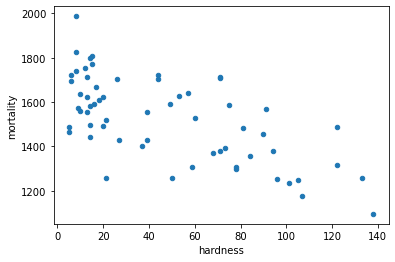

In [4]:
df.plot(x='hardness', y='mortality', kind='scatter');

1. Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки. 

In [5]:
from statsmodels.stats.weightstats import DescrStatsW

In [6]:
DescrStatsW.tconfint_mean?

In [7]:
# DescrStatsW.tconfint_mean( alpha=0.05, alternative='two-sided')

In [8]:
# from statsmodels.stats.weightstats import _zconfint_generic

In [9]:
mortality_mean = df['mortality'].mean()

In [10]:
# примерное вычисление
round(df['mortality'].mean() - 1.95996*df['mortality'].std(ddof=1)/(len(df['mortality'])-1)**0.5, 4)

1476.6618

In [11]:
# способ 1
import scipy.stats as st
st.t.interval(0.95, len(df['mortality'])-1, loc=df['mortality'].mean(), scale=st.sem(df['mortality']))

(1476.0833413552848, 1572.2117406119285)

In [12]:
# способ 2
import statsmodels.stats.api as sms
conf_interval = sms.DescrStatsW(df['mortality']).tconfint_mean()
conf_interval

(1476.0833413552848, 1572.2117406119285)

In [13]:
round(conf_interval[0], 4)

1476.0833

2. На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [14]:
mortality_south = df[df['location'] == 'South']['mortality']

In [15]:
conf_interval_south = st.t.interval(0.95, len(mortality_south)-1, loc=mortality_south.mean(), scale=st.sem(mortality_south))

In [16]:
conf_interval_south

(1320.1517462936238, 1433.463638321761)

In [17]:
round(conf_interval_south[1], 4)

1433.4636

3. На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод? 

In [18]:
mortality_north = df[df['location'] == 'North']['mortality']

In [19]:
conf_interval_north = st.t.interval(0.95, len(mortality_north)-1, loc=mortality_north.mean(), scale=st.sem(mortality_north))

In [20]:
conf_interval_north

(1586.5605251961385, 1680.6394748038613)

In [21]:
from matplotlib import pyplot as plt

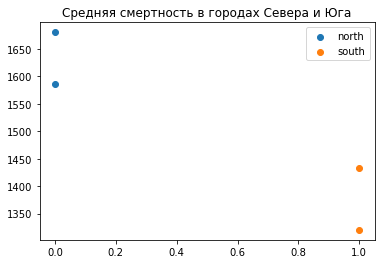

In [22]:
plt.scatter(x=[0, 0], y=conf_interval_north, label='north')
plt.scatter(x=[1, 1], y=conf_interval_south, label='south')
plt.legend()
plt.title('Средняя смертность в городах Севера и Юга')
plt.show()

4. Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [23]:
hardness_north = df[df['location'] == 'North']['hardness']
hardness_south = df[df['location'] == 'South']['hardness']

In [24]:
conf_interval_north_h = st.t.interval(0.95, len(hardness_north)-1, loc=hardness_north.mean(), scale=st.sem(hardness_north))
conf_interval_south_h = st.t.interval(0.95, len(hardness_south)-1, loc=hardness_south.mean(), scale=st.sem(hardness_south))

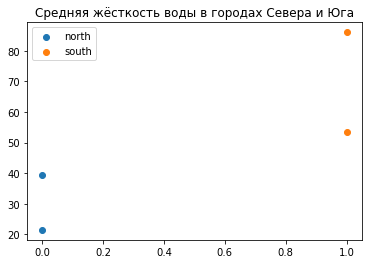

In [25]:
plt.scatter(x=[0, 0], y=conf_interval_north_h, label='north')
plt.scatter(x=[1, 1], y=conf_interval_south_h, label='south')
plt.legend()
plt.title('Средняя жёсткость воды в городах Севера и Юга')
plt.show()